In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import math

## Projet de fin de semestre 

#### --> Prédiction d'une partie d'image à partir d'un réseau de neurones

## Création d'une réseau de neurones from scratch

On souhaite créer un réseau de neurones qui puisse prédire correctement la partie d'une image manquante. Pour Cela, nous implémentons un réseau de neurones (NN), constitué de deux couches de neurones. 

Les neural networks sont inspirés du cerveau humain. On les représente comme un ensemble de noeuds auquels on attribue une valeur numérique. Les noeuds sont connectés entre eux par des poids qui sont assocé à chaque liaison. Pour determiner la valeur du noeud, on fait la somme de la multiplication entre le poids de la liason et son noeuds précédent associé. 

La première ligne de noeuds s'appelle la "input layer", tandis que la dernière se désigne "output layer". On calcul chaque couche à partir de la précédente.

De plus, à chaque noeud on défini un bias, qui est une valeur qu'on rajoute au calcul pour determiner la valeur du noeud. Les bias sont des valeurs aléatoires qui sont assignées aux noeuds, sauf pour la première couche, "input layer", qui n'en a pas

Finalement, notre neural network va créer une fonction coût, qui inclue tous les poids et bias, afin d'apprendre et de tout faire pour la minimiser. 

On note l la couche de neurons (sans prendre en compte l'input layer qui porte le numéro 0). 

Pour simplifier, nous pouvons représenter chaque couche et chaque poids comme une matrice, donc pour obtenir une nouvelle couche, on peut calculer :

$$n[l] = n^T[l-1] \times W[l] + B[l]$$

*avec n la matrice des valeurs des noeuds, W la matrice qui prend en compte le poids des liaisons, et enfin, B le bias à rajouter à chaque noeud*

Une fois les valeurs des noeuds determinés, il faut compréssé ces valeurs afin que l'ordinateur les comprennent, pour cela nous utilisons une "activation function".

On decrira ci-dessous les étapes afin de coder un neural network from scratch.

### 1/ On définit la fonction _init_():

On crée deux variables pour les biais b1 et b2 et deux variables pour le poids W1 et W2 car nous ne considérons un NN qu'à deux couches.

- Pour les biais: On crée un np array constitué de 0 de 1 ligne et de hidden_size colonnes

- Pour les weight : On crée un np array de nombre aléatoires (entre -1 et 1) de input_size lignes et de hidden_size colonnes

In [9]:
x = np.zeros((1, 5))
print(x)

[[0. 0. 0. 0. 0.]]


In [10]:
x = np.random.randn(2, 5)
print(x)

[[-0.11189209 -0.29201659 -0.18235612  1.29700679  0.64229534]
 [-2.34967592  2.49334728  0.06763593  0.29416105  1.13954299]]


In [11]:
def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.0001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate 

        self.b1= np.zeros((1, self.hidden_size))
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b2 = np.zeros((1, self.hidden_size))
        self.W2 = np.ransom.randn(self.input_size, self.hidden_size)

### 2/ On définit la fonction *ReLu()* et *ReLu_derivative()*: 

La relu fonction d'activation permet de ne pas avoir de poids négatifs dans les couches du NN. Donc avant de determiner le poids d'un neurone, on le passe dans la ReLu fonction. C'est une fonction qui ressemble à ceci: 

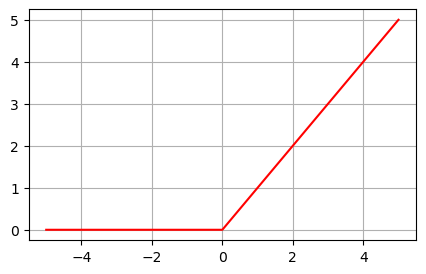

In [12]:
plt.figure(figsize = (5, 3))
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
f_x = []
for i in x: 
    if i > 0 : 
        f_x.append(i)
    else: 
        f_x.append(0)

plt.plot(x, f_x, color = 'red')
plt.grid()
plt.show()

### 3/ On définit la fonction *Sigmoid()* et *Sigmoid_derivative()*

De même on définit la fonction sigmoid qui permet d'obtenir des valeurs entre 0 et 1, et de normaliser les données. C'est que nous allons utiliser sur la deuxième couche afin d'obtenir en sortir les informations des pixels manquants. Cette fonction ressemble à ceci: 

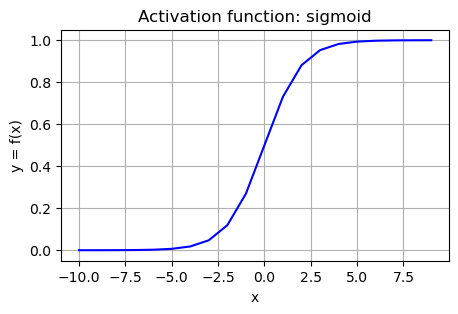

In [13]:
x = [i for i in range(-10, 10)]
f = [1/(1+math.exp(-i)) for i in x]
plt.figure(figsize = (5, 3))
plt.plot(x, f, color= 'blue')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('Activation function: sigmoid')
plt.grid()
plt.show()

### 4/ On définit la fonction *foward()*

Cette fonction consiste à effectuer le produit matriciel de la couche précédente de neurones, avec le poids de la couche, et on additionne au tout le biai. Cette fonction renvoie a2, qui est le résultat de la couche de sortie. 
Pour a1 on lui applique la fonction ReLu afin de s'assurer de ne pas avoir de valeurs négatives, et pour la deuxième couche, a2, on applique la fonction sigmoid afin d'écraser les informations des pixels.

In [14]:
def foward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.ReLu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.Sigmoid(self.z2)
        return self.a2

### 5/ On définit la fonction *backward()*

On utilise la méthode de rétrospective des gradients afin d'entrainer le modèle. Elle consiste à mettre à jour chaque poids des neurones de la dernière à la première couche, tout ça dans le but de minimiser l'érreur. 

In [ ]:
def backward(self, X, y, output): 
    m = X.shape[0] #Returns the number of line of the matrix X

    err2 = output - y
    dW2 = np.dot(self.a1.T, err2) / m 
    db2 = np.sum(err2) / m 

    err1 = np.dot(err2, self.W2.T)*self.ReLu_derivative(self.z1)
    dW1 = np.dot(X.T, err1)/m
    db1 = np.sum(err1) / m
        
    self.W2 -= self.learning_rate * dW2
    self.b2 -= self.learning_rate * db2
    self.W1 -= self.learning_rate * dW1
    self.b1 -= self.learning_rate * db1

### 6/ On définit la fonction *train()*

La fonction train permet de lancer l'entrainement du NN. On définit la liste "Loss" qui mesure à quel point notre NN est proche de la solution. Un NN vise à minimiser la loss. On définit de même les époques d'un NN, c'est-à-dire, le nombre de fois que nous allons lancer l'entrainement, avant de lui demander un résultat. 

Cette fonction prend en entrée X qui est une liste de nos données d'entrainement, y, la liste des pixels à prédire, et batch_size, qui la taille d'entrainement et de mise à jour des poids. 

On fait attention à mélanger l'ordre d'entrainement, afin de s'assurer que notre neural network n'apprenne pas par coeur l'ordre des réponses, auquel cas, nous aurions un résultat faussé. 

On appelle une fois la fonction *foward()* pour définir y_pred, avant d'appeler la fonction *backward()*.  

In [ ]:
def train(self, X, y, epochs, batch_size):
    loss = []
    for epoch in range(epochs): 
        m = X.shape[0]
        epoch_loss = 0

        #Mélanger l'ordre d'entrainement afin de vérifier que le modèle n'apprenne pas par coeur l'ordre 
        i = np.random.permutation(m)
        X_shuffle = X[i]
        y_shuffle = y[i]

        for i in range(0, m, batch_size):
            X_batch = X_shuffle[i:min(i+batch_size, m)] 
            y_batch = y_shuffle[i:min(i+batch_size, m)]

            type(X_batch)

            y_pred = self.foward(X_batch)

            #Calcule du MSE (erreur quadratique moyenne)
            mse = np.mean((y_pred - y_batch)**2)
            epoch_loss += mse* len(X_batch) / m

            self.backward(X_batch, y_batch, y_pred)

        loss.append(epoch_loss)

        if epoch%10 == 0 or epoch == epochs - 1:
            print(f'epoch {epoch}/{epochs} avec une perte de {epoch_loss}')
    return loss